In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# import csv file
df=pd.read_excel('C:\\Users\\Lenovo\\Downloads\\Diwali Sales Data (3) 01.xlsx')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [17]:
df.shape

(11251, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# drop unrelated/ columns
df.drop(['status','unnamed1'],axis=1,inplace=True)

In [25]:
# to check null values
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [ ]:
# drop null values
#pd.dropna(inplace=True)

In [ ]:
#df['Amount']=df['Amount'].astype('int')

In [47]:
df['Amount'].dtypes

dtype('float64')

In [49]:
# describe () method returns descriptions of the data in the 
# dataframe(i.e count,mean,std.etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [55]:
# use desscribe for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [ ]:
#Exploretery data analysis

In [ ]:
# gender

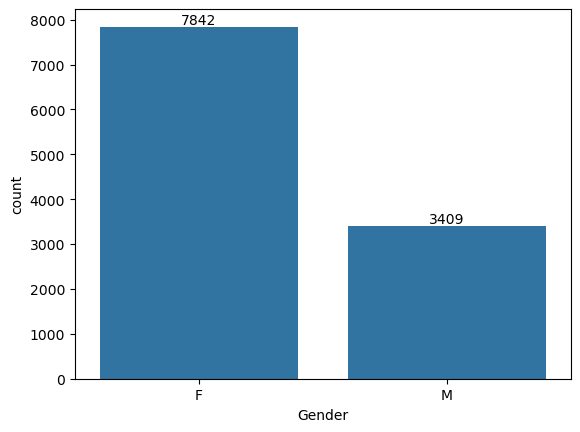

In [61]:
# plotting a bar chart for gender and its count
ax=sns.countplot(x='Gender',data=df) # male ,female
# male female
for bars in ax.containers:
    ax.bar_label(bars)

  Gender       Amount
0      F  74335856.43
1      M  31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

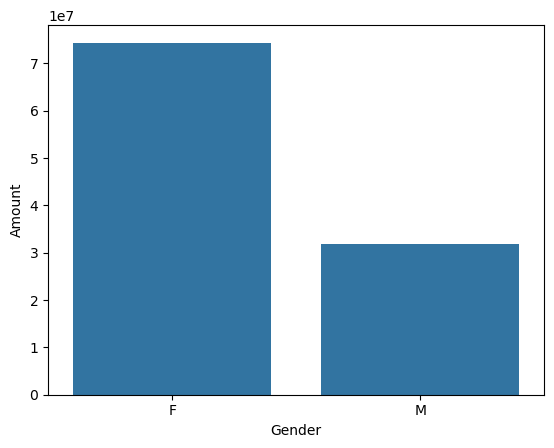

In [65]:
# plotting a bar chart for gender vs total amount
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_gen)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

In [ ]:
# From above graphs we can see that most of the buyers are females and even the purchasing
# power of females are greter than men

In [ ]:
#Age

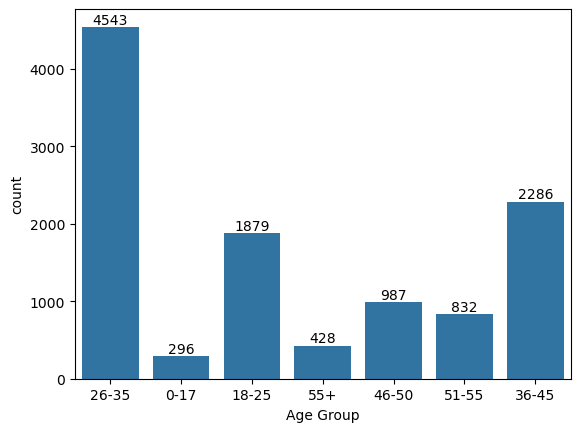

In [69]:
ax=sns.countplot(data=df,x='Age Group')
for bars in ax.containers:
    ax.bar_label(bars)

   Age Group Gender       Amount
4      26-35      F  30963954.94
6      36-45      F  15509957.49
2      18-25      F  11887003.00
5      26-35      M  11649489.00
8      46-50      F   6743393.00
7      36-45      M   6635038.00
10     51-55      F   5385208.00
3      18-25      M   5353729.00
11     51-55      M   2876269.00
9      46-50      M   2464451.00
12       55+      F   2404931.00
13       55+      M   1676056.00
0       0-17      F   1441409.00
1       0-17      M   1258244.00


<Axes: xlabel='Age Group', ylabel='Amount'>

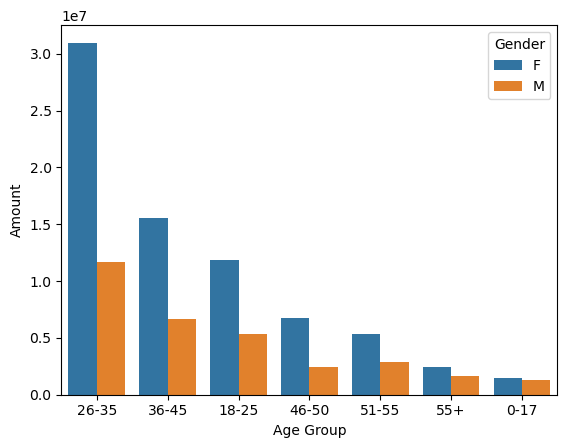

In [11]:
# Total Amount vs Age group
sales_age=df.groupby(['Age Group','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_age)
sns.barplot(x='Age Group',y='Amount',hue='Gender',data=sales_age)

from above graphs we can see that most of the buyers are of 
age group between 26-35 yrs females

               State Gender  Orders
28     Uttar Pradesh      F    3402
20       Maharashtra      F    2814
14         Karnataka      F    2266
4              Delhi      F    1872
18    Madhya Pradesh      F    1531
29     Uttar Pradesh      M    1411
0     Andhra Pradesh      F    1394
10  Himachal Pradesh      F    1079
21       Maharashtra      M     997
15         Karnataka      M     975


<Axes: xlabel='State', ylabel='Orders'>

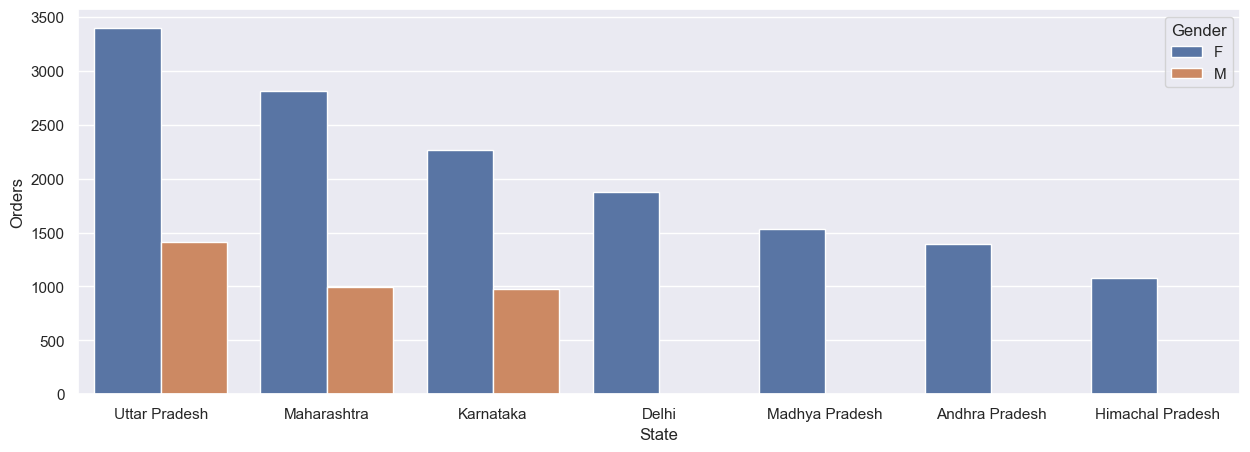

In [23]:
# total number of orders from  top 10 states
sales_state = df.groupby(['State','Gender'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

print(sales_state)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders',hue='Gender')

<Axes: xlabel='State', ylabel='Amount'>

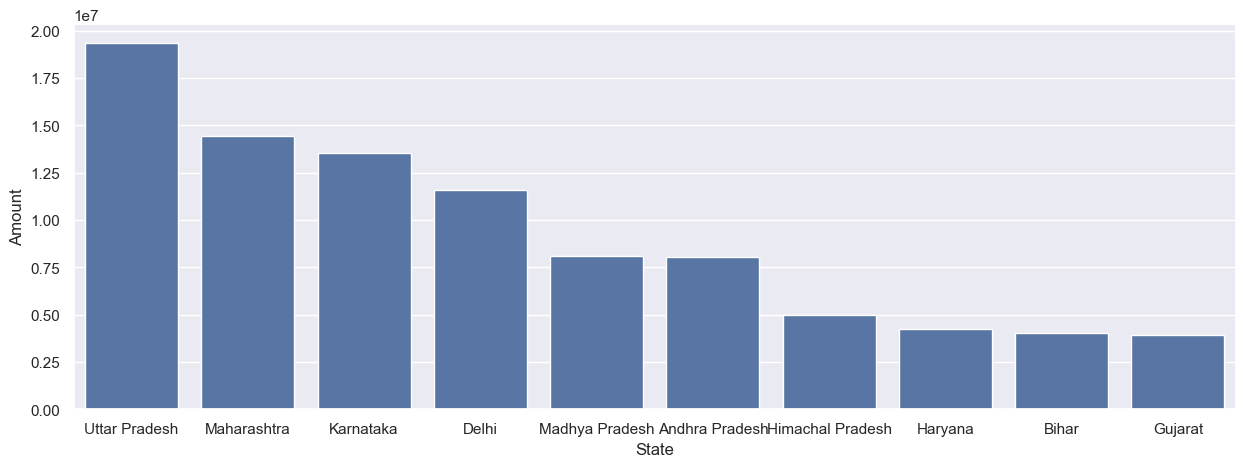

In [11]:
# total amount /sales from top 10 states
sales_state =df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Amount')                                                                             
                                                                            

From above graphs we see that most of the orders & total sales/amount
are from uttar pradesh ,maharashtra and karnataka respectively

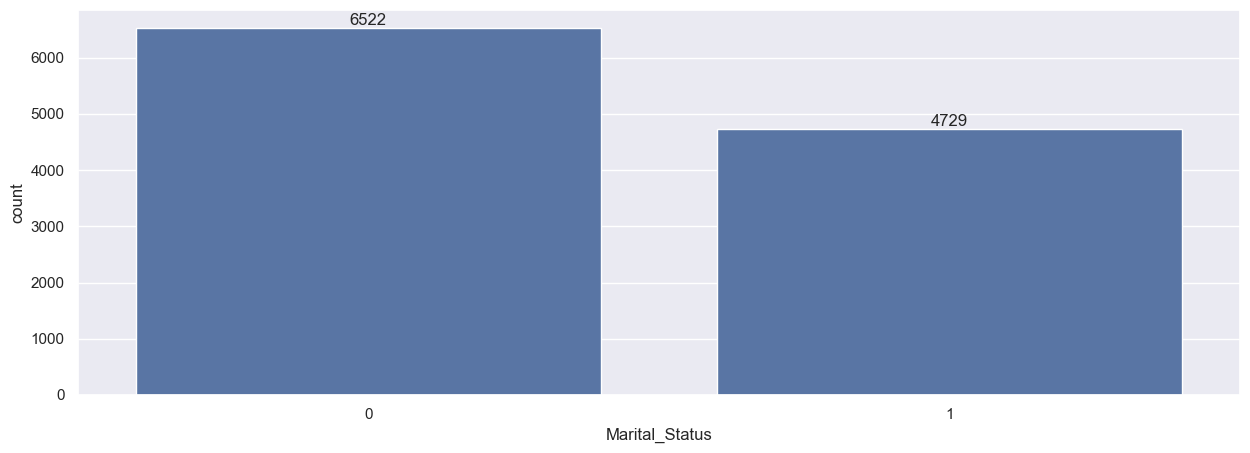

In [15]:
#Marital Status
ax=sns.countplot(data=df,x='Marital_Status')#0= married,1=unmarried

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

   Marital_Status Gender       Amount
0               0      F  43786648.44
2               1      F  30549207.99
1               0      M  18338738.00
3               1      M  13574538.00


<Axes: xlabel='Marital_Status', ylabel='Amount'>

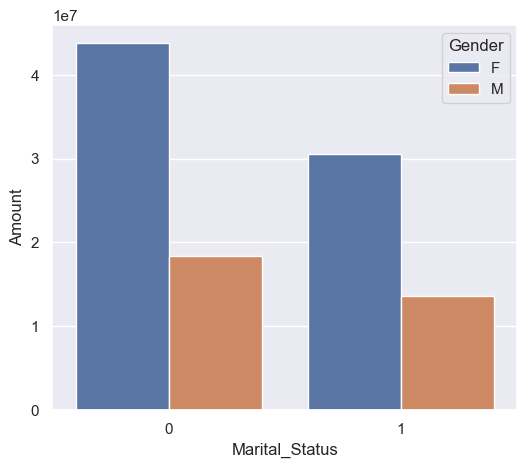

In [21]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_state)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

from above graphs we can see that most of the buyers ara married(women) and they 
have high purchasing power
occupations

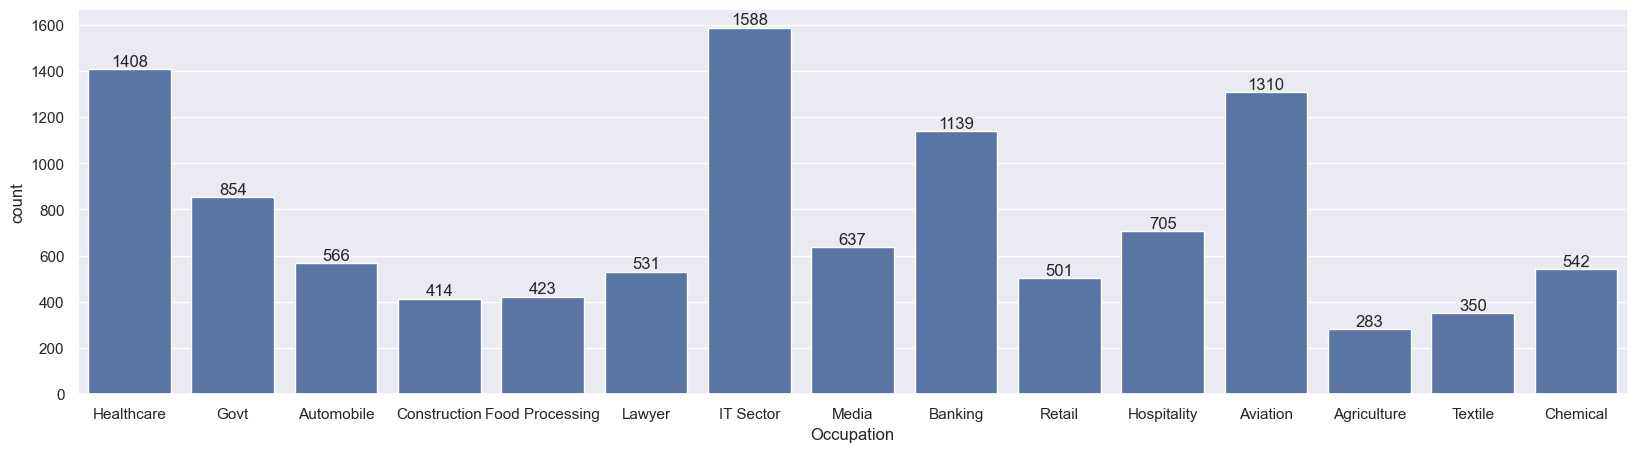

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data=df,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

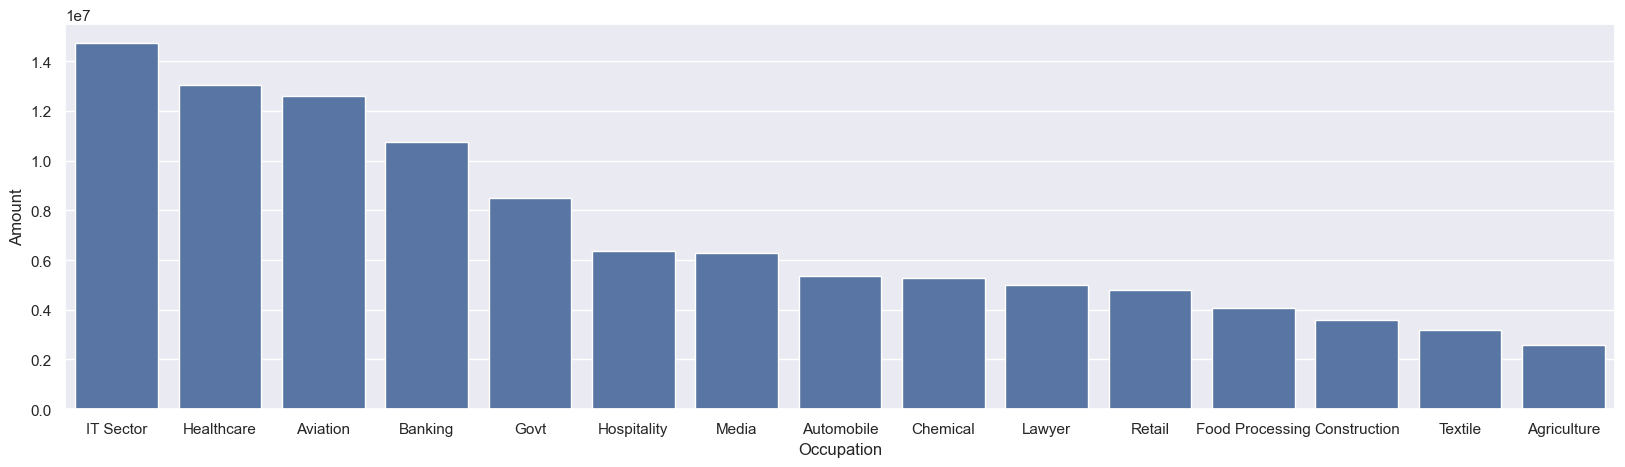

In [27]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

From above graphs we can see that most of the buyers are working in It ,healthcare , Aviation sector
product category

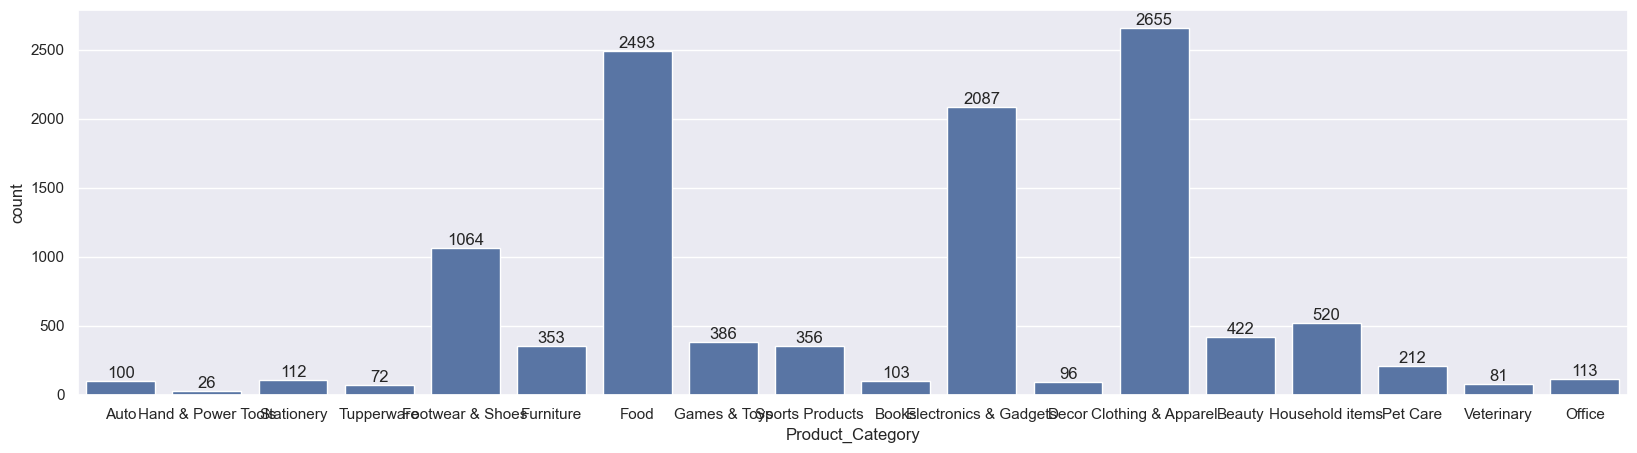

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Product_Category')

for bars in ax. containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

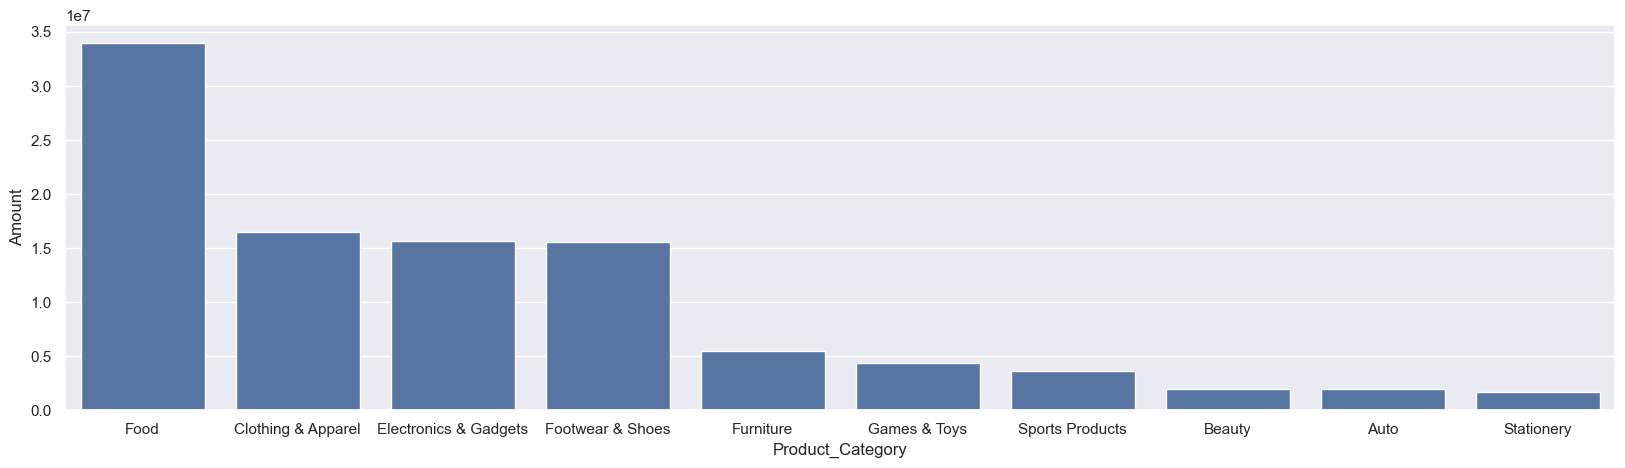

In [11]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount')

In [ ]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='order',ascending=False).head(10)
sns.set(rc={figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_Category'

from above graphs we can see that most of the sold products from food,clothing ,electronics category

In [ ]:
sales_sate=df.groupby(['Product_Catogory'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False.head(10
sns.set(rc={'figure,figsize':(20,5)})
                                                                                                                        

conclusion
Married women age group 26-35 yrs from up,Maharashtra ,karnataka working in IT ,healthcare,Aviation are more likely to buy products from food ,clothing and electronics category

Thank you